### History
The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. There were an estimated 2,224 passengers and crew aboard the ship, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster.

### Goal
In this challenge we are asked to predict whether a passenger on the titanic would have been survived or not.

### Import the libraries

In [2]:
# Linear Algebra
import numpy as np

# Data Processing
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

### Getting the data

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### Data Exploration/Analysis

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above data, we can observe that about 38% out of the training-set have survived the Titanic. Also we can see that passanger ages range between 0.4 to 80. On top we can already detect some features, that contain missing values, like that of 'Age'feature.

In [6]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


From the above observation, we can notice few things - converting categorical features into numeric values and dealing with missing values, also rescaling the data to have them all in same scale.

##### Lets see what data is actually missing

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [8]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

From the above we can see 11 features and a target variable survived. 

##### What features could contribute to a high survival rate?

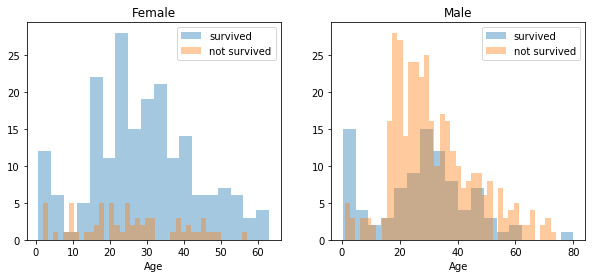

In [9]:
# Age and Sex:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18,
                 label = survived, ax = axes[0], kde=False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, 
                 label = not_survived, ax = axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18,
                 label = survived, ax = axes[1], kde=False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, 
                 label = not_survived, ax = axes[1], kde=False)
ax.legend()
_ = ax.set_title('Male')

From the above data we can observe that men have high probability of survival when they're between 18 and 30 years old, whereas women have more survival chances between 14 and 40. On the other hand, men have low survival chances between age 5 and 18, which so not true for women. Another thing to notice is that infants also have a little bit higher probability of survival.

/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


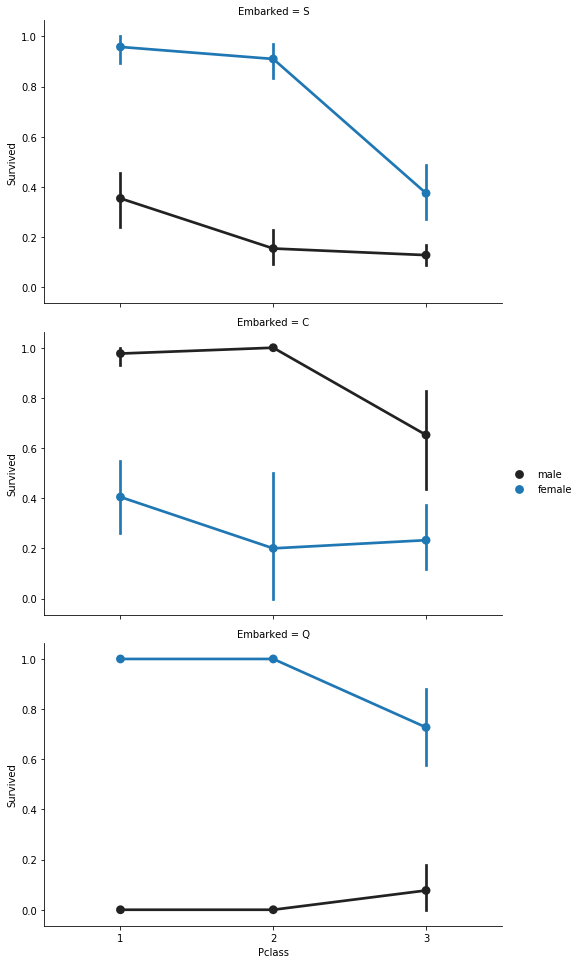

In [10]:
# Embarked and Sex:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

Embarked seems to be correlated with survival, depending on the gender. As we can see, women on port Q and S have a higher survival chance which inverse in case of port C. Men on the other hand, have high survival probability if they are on port C, but a low probability if they are on port Q or S.

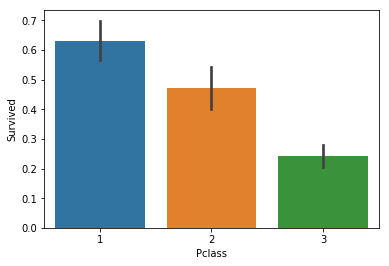

In [11]:
# Pclass and Sex:
sns.barplot(x='Pclass', y='Survived', data=train_df)

From above plot, we can that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


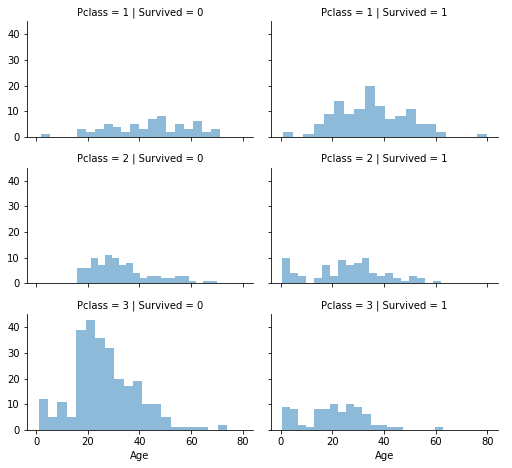

In [12]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

The above plot confirms our assumption about pclass 1, but we can also spot a high probability that a person in pclass 3 will not survive.

In [13]:
# SibSp and Parch:
# Total number of relatives, a person has on Titanic
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()    

1    537
0    354
Name: not_alone, dtype: int64

/Users/jessica/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


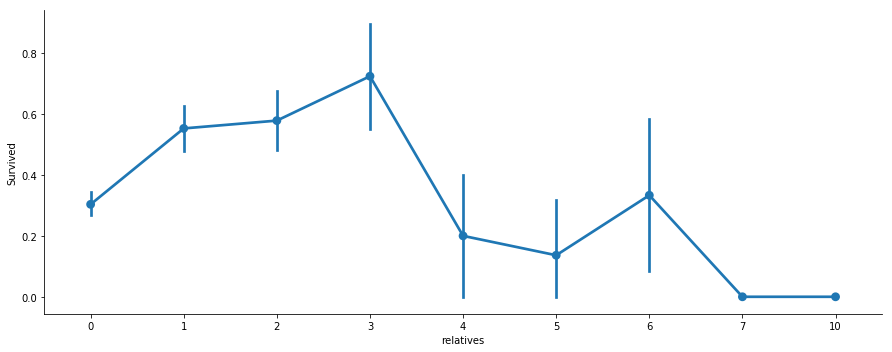

In [16]:
axes = sns.factorplot('relatives', 'Survived', data=train_df, aspect=2.5)

From the above plot, we can see that a person has high probability of survival with 1 to 3 relatives, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

### Data Preprocessing

In [14]:
# Will be dropping 'PassengerId' from the train set
# Since it doesn't contribute to a persons survival

train_df = train_df.drop(['PassengerId'], axis=1)

##### Lets handle missing data

In [15]:
# Persons Deck
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# Dropping the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [16]:
# Age - Fill in missing values
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
    
train_df["Age"].isnull().sum()

0

In [17]:
# Embarked - Filling in missing values 
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [18]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

##### Converting Features

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int64
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int64
Deck         891 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


From the above data, we can see that 'Fare' is float  and 4 other categorical features - Name, Sex, Ticket, Embarked.

In [20]:
# Fare: COnvert from 'float64' using astype to 'int64'
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [21]:
# Names - Extract titles
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [22]:
# Sex - Convert into numeric values
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [23]:
# Ticket: 
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [24]:
# Since ticket has 681 unique tickets, it will
# be tricky to convert them into useful categories
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [25]:
# Embarked:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Creating Categories

In [26]:
# Creating different age group feature 
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

4    161
6    159
5    157
3    127
2    114
1    105
0     68
Name: Age, dtype: int64

In [27]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

In [28]:
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,3,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,3,0,0,1,5,1
7,0,3,0,0,3,1,2,0,4,0,8,4
8,1,3,1,3,0,2,1,0,2,0,8,3
9,1,2,1,1,1,0,2,1,1,0,8,3


### Creating new features

In [29]:
# Age Times Class
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class'] = dataset['Age'] * dataset['Pclass']

In [30]:
# Fare per person
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
    
train_df.head(10)    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,3,0,0,1,2,0,1,8,1,9,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


### Build Machine Learning Models

In [31]:
# Define the feature and target matrix
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId", axis=1).copy()

##### Stochastic Gradient Descent

In [32]:
model_SGD = linear_model.SGDClassifier(max_iter=5, tol=None)
model_SGD.fit(X_train, Y_train)
pred_SGD = model_SGD.predict(X_test)

model_SGD.score(X_train, Y_train)

acc_SGD = round(model_SGD.score(X_train, Y_train) * 100, 2)

/Users/jessica/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


##### Random Forest

In [33]:
model_RF = RandomForestClassifier(n_estimators=100)
model_RF.fit(X_train, Y_train)
pred_RF = model_RF.predict(X_test)

model_RF.score(X_train, Y_train)
acc_RF = round(model_RF.score(X_train, Y_train) * 100, 2)

##### Logistic Regression

In [34]:
model_LR = LogisticRegression()
model_LR.fit(X_train, Y_train)
pred_LR = model_LR.predict(X_test)

model_LR.score(X_train, Y_train)
acc_LR = round(model_LR.score(X_train, Y_train) * 100, 2)

/Users/jessica/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### K Nearest Neighbor

In [35]:
model_knn = KNeighborsClassifier(n_neighbors = 3)
model_knn.fit(X_train, Y_train)
pred_knn = model_knn.predict(X_test)

model_knn.score(X_train, Y_train)
acc_knn = round(model_knn.score(X_train, Y_train) * 100, 2)

##### Gaussian Naives Bayes

In [36]:
model_GNB = GaussianNB()
model_GNB.fit(X_train, Y_train)
pred_knn = model_GNB.predict(X_test)

model_GNB.score(X_train, Y_train)
acc_GNB = round(model_GNB.score(X_train, Y_train) * 100, 2)

##### Linear Support Vector Machine

In [37]:
model_Linear_SVC = LinearSVC()
model_Linear_SVC.fit(X_train, Y_train)

Y_pred = model_Linear_SVC.predict(X_test)

acc_linear_svc = round(model_Linear_SVC.score(X_train, Y_train) * 100, 2)

/Users/jessica/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


##### Decision Tree

In [38]:
model_DT = DecisionTreeClassifier() 
model_DT.fit(X_train, Y_train)  
Y_pred = model_DT.predict(X_test) 

model_DT.score(X_train, Y_train)
acc_decision_tree = round(model_DT.score(X_train, Y_train) * 100, 2)

### Performance Analysis

In [39]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 
              'KNN', 
              'Logistic Regression', 
              'Random Forest', 
              'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, 
              acc_knn, 
              acc_LR, 
              acc_RF, 
              acc_GNB,  
              acc_SGD, 
              acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.37,Random Forest
92.37,Decision Tree
86.98,KNN
82.15,Logistic Regression
81.59,Support Vector Machines
80.92,Stochastic Gradient Decent
78.00,Naive Bayes


As we can see from the above statistics that Random Forest performsthe best, lets verify that using cross-validation.

### K-Fold Cross Validation
This method randomly splits the training data into K subsets called folds.

In [40]:
# Here we will be using about 10 folds
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring="accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.82222222 0.75280899 0.82022472 0.8988764  0.83146067
 0.80898876 0.7752809  0.84269663 0.84090909]
Mean: 0.8171246169560776
Standard Deviation: 0.03955485451248687


The above results look more realistic & promising than before, meaning, our model has an average accuracy of 82% with a standard deviation of 4%.

### Feature Importance
Relative importance of each feature

In [41]:
importances = pd.DataFrame({'feature':X_train.columns, 'importance':np.round(model_RF.feature_importances_, 3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.188
Title,0.183
Age_Class,0.099
Deck,0.082
Age,0.076
Pclass,0.075
Fare,0.067
relatives,0.059
Embarked,0.054


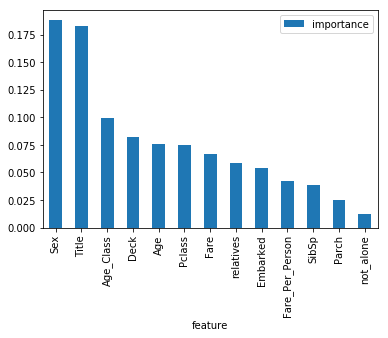

In [42]:
importances.plot.bar()

From the above plot, it seems that features - not_alone & parch don't play significant role in our random forest classifier prediction process, so lets think dropping those two features from our dataset and training the classifier again.

In [43]:
train_df = train_df.drop("not_alone", axis=1)
test_df = test_df.drop("not_alone", axis=1)

train_df = train_df.drop("Parch", axis=1)
test_df = test_df.drop("Parch", axis=1)

##### Training random forest classifier with new updates 

In [44]:
model_rf = RandomForestClassifier(n_estimators=100, oob_score = True)
model_rf.fit(X_train, Y_train)
pred_rf = model_rf.predict(X_test)

model_rf.score(X_train, Y_train)
acc_rf = round(model_rf.score(X_train, Y_train) * 100, 2)
print(round(acc_rf,2,), "%")

92.37 %


From the above result, we can see that Random Forest Classifier performed as good as it did before, but as a general rule, the more features you have, the more likely your model will suffer from overfitting, which in our case, the data looks fine as it doesn't have too many features. Another better way to gauge or estimate generalization accuracy is to use out-of-bag score.

In [45]:
print("oob score:", round(model_rf.oob_score_, 4)*100, "%")

oob score: 81.93 %


### Further Evaluation

##### Confusion Matrix

In [47]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(model_rf, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[480,  69],
       [ 99, 243]])

From the above result, the first row indicates not-survived predictions - 480 passengers were correctly classified as not survived(true negatives) and 69 were wrongly classified as not survived(false positives); the second row indicates about survived predictions - 99 passengers were wrongly classified as survived(false negatives) and 243 were correctly classified as survived(true positives).

##### Precision & Recall

In [50]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:", recall_score(Y_train, predictions))

Precision: 0.7788461538461539
Recall: 0.7105263157894737


From the above result, we can see that our model predicts 79% of the time, a passengers survival correctly (precision). While recall tells us that it predicted the survival of 71% of the people who actually survived.

##### F-Score

In [51]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7431192660550459

##### Precision Recall Curve
RF computes a probability based on a function & it classifies the person as survived(when the score is bigger than the threshold) or as not survived(when the score is smaller than the threshold).

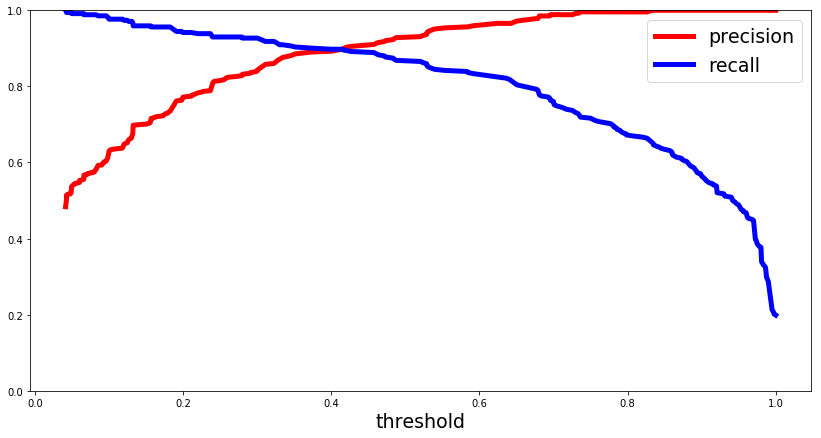

In [52]:
from sklearn.metrics import precision_recall_curve

# Getting the probabilities of our predictions
y_scores = model_rf.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)

def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])
    
plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

From the above plot, we can clearly see that the recall is falling of rapidly at a precision of around 85%, so we might want to select the precision/recall tradeoff before that - maybe around 75%.

Finally, we can choose a threshold that would give us better precision/recall tradeoff for our current problem. For instance, a precision of 80%, would need a threshold of around 0.4, from the above plot, which can then be used to train the model to good accuracy.

### ROC AUC Curve

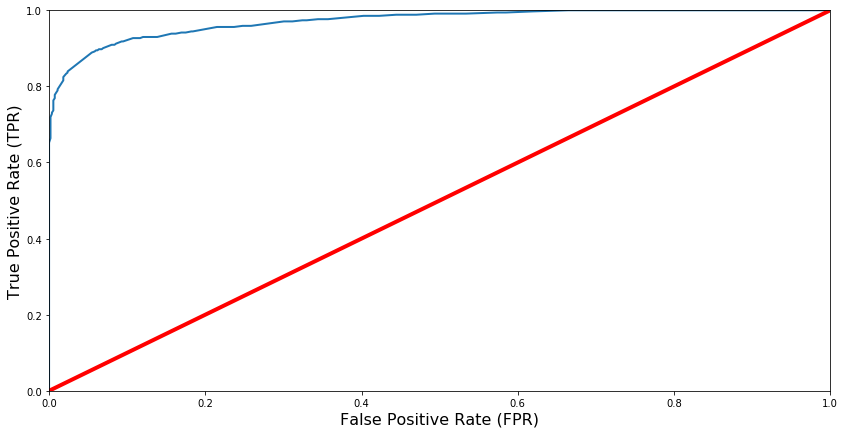

In [53]:
from sklearn.metrics import roc_curve
# Compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# Plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

From the above plot, we can see that the red line in the middle represents a purely random classifier & therefore our classifier should be as far away from it as possible, in short our random forest model seems to have done good job.

### ROC AUC Score

In [54]:
from sklearn.metrics import roc_auc_score
model_roc_auc_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", model_roc_auc_score)

ROC-AUC-Score: 0.9715191895951171


I think this score seems to good enough, as a classifier that is 100% correct would have an ROC AUC Score of 1 but a completely random classifier would have a score of 0.5.